In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [39]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from cofactor.features import Features
from cofactor.model import LatticePredictor
from cofactor.calculator import CofactorCalculator

In [3]:
featgen = Features.from_excel('data/elemental.xlsx')
model = LatticePredictor.from_file('models/model.pkl')
data = pd.read_csv('data/lattices.csv', index_col=0)

### Example from Eddie's paper

In [4]:
example_eddie = np.array([
    [11.393534002229654, 470.7213578500707],
    [12.508361204013376, 348.5148514851487],
    [12.909698996655514, 300.9900990099011],
    [13.444816053511701, 178.78359264497885],
    [13.846153846153847, 20.367751060820638],
])

cofactors_eddie = np.array([
    [12.497816164285508, 0.9977867711289287],
    [13.000483412177577, 0.9981617632840819],
    [13.498258868069184, 0.9990191227680352]
])

In [5]:
inputs = {
    'Ce': example_eddie[:, 0].reshape(-1, 1) / 100,
    'Zr': 1 - example_eddie[:, 0].reshape(-1, 1) / 100,
    'T': example_eddie[:, 1].reshape(-1, 1)
}
X = featgen.get_features(inputs, model.features)

/miniconda3/envs/dskoda/lib/python3.7/site-packages/pandas/core/indexing.py:1017: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


In [6]:
cofactors = []
for tetr, mono in model.predict_lattice(X[model.features]):
    calc = CofactorCalculator(tetr, mono)
    cofactors.append(calc.get_cofactors())

In [7]:
results = pd.concat([X, pd.DataFrame(cofactors)], axis=1)

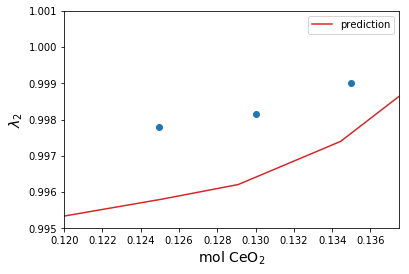

In [8]:
fig, ax = plt.subplots(figsize=(6, 4))

results.plot(x='Ce', y='B', ax=ax, color='#d62728', label='prediction')
ax.scatter(cofactors_eddie[:, 0] / 100, cofactors_eddie[:, 1], marker='o', label='Eddie')

ax.set_ylim(0.995, 1.001)
ax.set_xlim(0.12, 0.1375)
# ax.get_legend().remove()

ax.set_ylabel(r'$\lambda_2$', fontsize=14)
ax.set_xlabel(r'mol CeO$_2$', fontsize=14)

plt.show()

### Titanium

In [9]:
t0 = pd.read_csv('data/t0/Ti.csv')

In [10]:
t0['T0'] = t0['T0 (K)'] - 273
t0['x'] = t0['mol%TiO2'] / 100

In [11]:
temperatures, Ti = np.meshgrid(
    np.linspace(300, 1200, 90),
    np.linspace(0, 0.20, 40)
)

inputs = {
    'Ti': Ti.reshape(-1, 1),
    'Zr': 1 - Ti.reshape(-1, 1),
    'T': temperatures.reshape(-1, 1)
}
X = featgen.get_features(inputs, model.features)

/miniconda3/envs/dskoda/lib/python3.7/site-packages/pandas/core/indexing.py:1017: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


In [12]:
cofactors = []
for tetr, mono in model.predict_lattice(X[model.features]):
    calc = CofactorCalculator(tetr, mono)
    cofactors.append(calc.get_cofactors())

In [13]:
results = pd.concat([X, pd.DataFrame(cofactors)], axis=1)

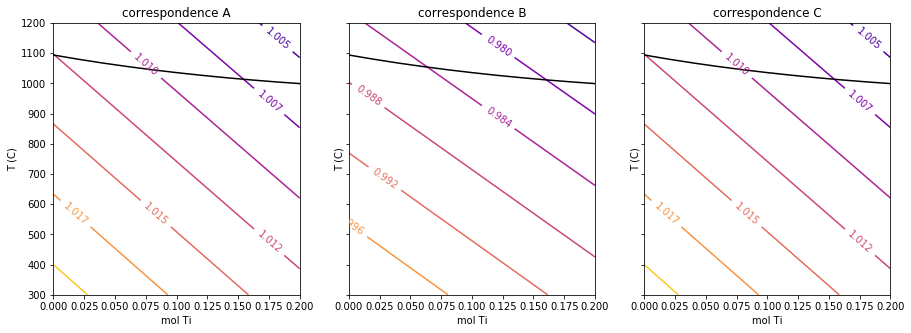

In [14]:
fig, ax_fig = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for ax, label in zip(ax_fig, ['A', 'B', 'C']):
    CS = ax.contour(
        results[label].values.reshape(40, 90),
        extent=(results['Ti'].min(), results['Ti'].max(), results['T'].min(), results['T'].max()),
        cmap='plasma'
    )

    ax.clabel(CS, CS.levels, inline=True, fontsize=10)
    
    ax.plot(t0.x, t0.T0, 'k')

    ax.set_xlabel('mol Ti')
    ax.set_ylabel('T (C)')
    ax.set_title('correspondence %s' % label)
                       
plt.show()

#### With transformation temperature

In [24]:
inputs = {
    'Ti': t0.x.values.reshape(-1, 1),
    'Zr': 1 - t0.x.values.reshape(-1, 1),
    'T': t0.T0.values.reshape(-1, 1)
}
X = featgen.get_features(inputs, model.features)

/miniconda3/envs/dskoda/lib/python3.7/site-packages/pandas/core/indexing.py:1017: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


In [27]:
cofactors = []
for tetr, mono in model.predict_lattice(X[model.features]):
    calc = CofactorCalculator(tetr, mono)
    cofactors.append(calc.get_cofactors())

In [28]:
results = pd.concat([X, pd.DataFrame(cofactors)], axis=1)

In [29]:
results

,T,en_p,ea,valence,rad_slater,rad_clementi,Ti,Zr,A,B,C
0,1094.000000,1.3300,0.42600,4.0,1.550,2.060,0.00,1.00,1.014314,0.991268,1.014314
1,1080.130071,1.3342,0.41906,4.0,1.547,2.054,0.02,0.98,1.013472,0.989898,1.013472
2,1067.465116,1.3384,0.41212,4.0,1.544,2.048,0.04,0.96,1.012618,0.988514,1.012618
3,1055.897920,1.3426,0.40518,4.0,1.541,2.042,0.06,0.94,1.011753,0.987117,1.011753
4,1045.336484,1.3468,0.39824,4.0,1.538,2.036,0.08,0.92,1.010878,0.985709,1.010878
5,1035.701754,1.3510,0.39130,4.0,1.535,2.030,0.10,0.90,1.009994,0.984289,1.009994
6,1026.925788,1.3552,0.38436,4.0,1.532,2.024,0.12,0.88,1.009101,0.982859,1.009101
7,1018.950265,1.3594,0.37742,4.0,1.529,2.018,0.14,0.86,1.008200,0.981420,1.008200
8,1011.725275,1.3636,0.37048,4.0,1.526,2.012,0.16,0.84,1.007290,0.979972,1.007290
9,1005.208343,1.3678,0.36354,4.0,1.523,2.006,0.18,0.82,1.006374,0.978516,1.006374


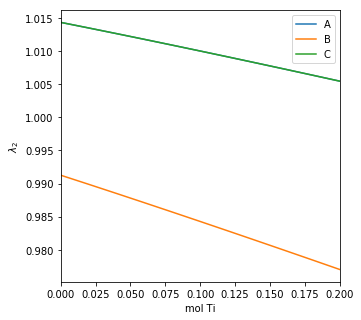

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

results.plot(x='Ti', y=['A', 'B', 'C'], ax=ax)

ax.set_xlabel('mol Ti')
ax.set_ylabel(r'$\lambda_2$')
                       
plt.show()

In [51]:
df

,mol%Y2O3iO2,T0 (K),Ms (K),T0,x
0,0.5,1125.772584,973.371700,852.772584,0.005
1,1.0,879.668064,725.024264,606.668064,0.010
2,1.5,629.557866,472.842553,356.557866,0.015


In [60]:
def features_from_t0(t0, element):
    t0['T0'] = t0['T0 (K)'] - 273
    t0['x'] = t0.iloc[:, 0] / 100
    
    inputs = {
        element: t0.x.values.reshape(-1, 1),
        'Zr': 1 - t0.x.values.reshape(-1, 1),
        'T': t0.T0.values.reshape(-1, 1)
    }
    X = featgen.get_features(inputs, model.features)
    
    return X

def plot_lambda(element, results, ax):
    results.plot(x=element, y=['A', 'B', 'C'], ax=ax)
    ax.plot(
        [results[element].min(), results[element].max()],
        [1, 1],
        'k',
        linewidth=0.5
    )

    ax.set_xlabel('mol %s' % element)
    ax.set_ylabel(r'$\lambda_2$')
    return ax

/miniconda3/envs/dskoda/lib/python3.7/site-packages/pandas/core/indexing.py:1017: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
/miniconda3/envs/dskoda/lib/python3.7/site-packages/pandas/core/indexing.py:1017: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


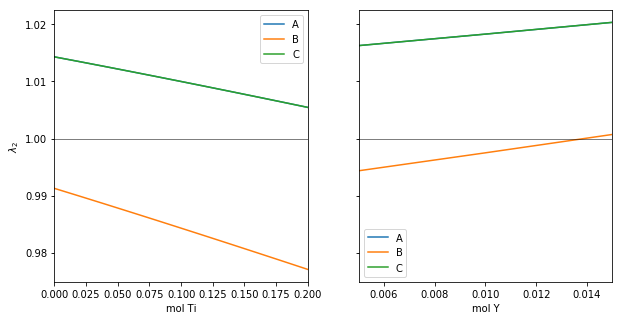

In [61]:
files = sorted(os.listdir('data/t0'))
N = len(files)
fig, ax_fig = plt.subplots(1, N, figsize=(5 * N, 5), sharey=True)

for file, ax in zip(files, ax_fig.reshape(-1)):
    element = file.strip('.csv')
    df = pd.read_csv(os.path.join('data/t0', file))
    X = features_from_t0(df, element)
    results = calc_cofactors(X, model)
    plot_lambda(element, results, ax)    

In [62]:
results

,T,en_p,ea,valence,rad_slater,rad_clementi,Y,Zr,A,B,C
0,852.772584,1.32945,0.425405,3.995,1.55125,2.0603,0.005,0.995,1.016281,0.994343,1.016281
1,606.668064,1.32890,0.424810,3.990,1.55250,2.0606,0.010,0.990,1.018298,0.997492,1.018298
2,356.557866,1.32835,0.424215,3.985,1.55375,2.0609,0.015,0.985,1.020358,1.000707,1.020358


### All elements in features

In [36]:
def gen_features(element, model):
    temperatures, fraction = np.meshgrid(
        np.linspace(300, 1200, 100),
        np.linspace(0, 0.15, 30)
    )

    inputs = {
        element: fraction.reshape(-1, 1),
        'Zr': 1 - fraction.reshape(-1, 1),
        'T': temperatures.reshape(-1, 1)
    }
    X = featgen.get_features(inputs, model.features)
    
    return X

def calc_cofactors(X, model):
    cofactors = []
    for tetr, mono in model.predict_lattice(X[model.features]):
        calc = CofactorCalculator(tetr, mono)
        cofactors.append(calc.get_cofactors())
    
    results = pd.concat([X, pd.DataFrame(cofactors)], axis=1)
    
    return results

def plot_contours(element, results, ax_fig):
#     fig, ax_fig = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

    for ax, label in zip(ax_fig, ['A', 'B', 'C']):
        CS = ax.contour(
            results[label].values.reshape(30, 100),
            extent=(results[element].min(), results[element].max(), results['T'].min(), results['T'].max()),
            cmap='plasma'
        )

        ax.clabel(CS, CS.levels, inline=True, fontsize=10)

        ax.set_xlabel('mol %s' % element)
        ax.set_ylabel('T (C)')
        ax.set_title('correspondence %s' % label)

#     plt.show()

In [ ]:
N = len(featgen.atomic_feat.index) - 1
fig, ax_fig = plt.subplots(N, 3, figsize=(15, 5 * N), sharey=True)

for idx, element in enumerate(featgen.atomic_feat.index):
    if element == 'Zr':
        continue
    
    X = gen_features(element, model)
    results = calc_cofactors(X, model)

    plot_contours(element, results, ax_fig[idx])

In [ ]:
fig.savefig('cofactors.pdf')